# <font color='Brown'> <center> Zomato Restaurant Rating Prediction

**Problem Statement: Zomato Restaurant Rating Prediction in Bengaluru City**

**`Background:`**
- Zomato is an online platform that allows users to discover restaurants, browse menus, and read reviews. One of the key features of Zomato is its rating system, where users can rate restaurants based on their dining experiences. These ratings help users make informed decisions about where to dine.

**`Objective:`**
- The objective of this project is to build a machine learning model that can predict the ratings of restaurants listed on Zomato in Bengaluru city. By accurately predicting restaurant ratings, we aim to provide users with valuable insights into the quality of dining experiences they can expect.

**`Data Description:`**
- The dataset contains information about various restaurants in Bengaluru, including their names, locations, cuisines, average cost for two, ratings, reviews, and more. It also includes user-generated reviews and ratings.

**Tasks:**

1. Data Collection: Obtain the Zomato restaurant dataset for Bengaluru city.
2. Data Preprocessing: Clean and preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features.
3. Exploratory Data Analysis (EDA): Explore the dataset to gain insights into restaurant distributions, cuisine trends, average costs, and ratings distribution.
4. Feature Engineering: Create new features or extract useful information from existing features that could improve the model's performance.
5. Model Building: Build machine learning models to predict restaurant ratings based on relevant features. Consider regression techniques suitable for predicting numerical ratings.
6. Model Evaluation: Evaluate the performance of the models using appropriate metrics such as mean squared error (MSE), R-squared, or accuracy (if ratings are discretized).
7. Model Fine-Tuning: Fine-tune the models by adjusting hyperparameters or trying different algorithms to improve predictive performance.
8. Model Deployment: Deploy the best-performing model for predicting Zomato restaurant ratings in Bengaluru city, making it accessible for users to utilize.

**`Expected Outcome:`**
- The expected outcome is a robust machine learning model capable of accurately predicting Zomato restaurant ratings in Bengaluru city. This model can be integrated into Zomato's platform to provide users with personalized restaurant recommendations based on their preferences.

**`Key Deliverables:`**

Cleaned and preprocessed dataset.
Exploratory data analysis report.
Trained machine learning models with evaluation metrics.
Model deployment guidelines or scripts.
Success Criteria:

Achieving a low mean squared error (MSE) or high R-squared value for the rating predictions.
Model generalizability and performance on unseen data.
User feedback and satisfaction with the rating predictions provided by the model.
Constraints:

Availability and quality of Zomato restaurant data for Bengaluru city.
Consideration of privacy and ethical concerns related to user data and reviews.
Stakeholders:

Zomato platform users seeking restaurant recommendations.
Zomato platform administrators and developers.
Data scientists and machine learning engineers involved in model development and deployment.

**This problem statement outlines the objectives, tasks, expected outcomes, success criteria, constraints, and stakeholders involved in predicting Zomato restaurant ratings in Bengaluru city. Adjustments can be made based on specific requirements or additional details available about the dataset and project scope.**



## Importing the required dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\admin\Downloads\INeuron Projects\zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
## checking null values

print(df.isnull().sum())
print('\n')
print(df.isnull().sum()/len(df) * 100)

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                    

In [7]:
df.duplicated().sum()

0

In [8]:
## statistically data
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


#### Data Manipulation

In [9]:
## replacing our target columns

df['rate'] = df['rate'].str.replace('/5','').replace('-','')
df['rate'].replace('', np.nan, inplace=True)
sample = df[df['rate']!='NEW']

In [10]:
## renaming the columns for our usuability
sample.rename(columns={'online_order':'Online Order','approx_cost(for two people)':'Cost for 2','reviews_list':'Reviews',
                       'listed_in(city)':'Area','listed_in(type)':'DineType'},inplace=True)

sample['Reviews'] = sample['Reviews'].str.replace('[]','Not Available')

In [11]:
## removing unncessary columns
sample.drop(columns=['menu_item','url','address','phone'],inplace=True)

In [12]:
## type casting object columns to floating values

sample['rate'] = sample['rate'].astype('float')

In [13]:
sample['Cost for 2'] = sample['Cost for 2'].str.replace(',','')
sample['Cost for 2'] = sample['Cost for 2'].astype('float')

### Experimenting and find the best way to impute missing values

In [14]:
sample['mean'] = sample['rate'].fillna(sample['rate'].mean())
sample['median'] = sample['rate'].fillna(sample['rate'].median())

In [15]:
sample['rate_interpolate_poly_1'] = sample['rate'].interpolate(method ='polynomial',order=1)

In [16]:
print("Original:", sample['rate'].var())
print("Simple Mean:", sample['mean'].var())
print("Simple Median", sample['median'].var())
print("Interpolate with polynomial:", sample['rate_interpolate_poly_1'].var())

Original: 0.1940514978663325
Simple Mean: 0.1633061648037214
Simple Median 0.1633061916627877
Interpolate with polynomial: 0.18479446978903158


In [17]:
sample['rate'] = sample['rate'].interpolate(method ='polynomial',order=1)
sample.drop(columns=['rate_interpolate_poly_1','mean','median'],inplace=True)

`Observation`: 
- Polynomial with order 1 gave best result and linear gave the best results.
- Both the values did not distort the distribution of ratings column, which is the best thing.
- But the problem is covariance to the other columns has reduced by 14 which is not prefereble.
- We will try out other different methods and find out the best method
- Simple Mean and Median are not performing well Interpolate

#### Location Column

In [18]:
print(sample['location'].nunique())
print(sample['Area'].nunique())

93
30


Both Area and Location columns are same but location column contains more unique values. so we are going to drop area column and impute location column

In [19]:
sample['location'].fillna('MISSING',inplace=True)

In [20]:
sample.drop(columns=['Area'],inplace=True)

#### Rest Type Column

In [21]:
sample['rest_type'].nunique()

93

In [22]:
x = sample['rest_type'].values
sample['rest_type'] = sample['rest_type'].fillna(np.random.choice(x))

#### Cost for 2 column

In [23]:
import numpy as np

# Log transform using numpy
sample['log_transformed_column'] = np.log(sample['Cost for 2'] + 1)  # Adding 1 to avoid log(0)

sample['Cost for 2'] = sample['log_transformed_column']
sample.drop(columns=['log_transformed_column'],inplace=True)

In [24]:
sample['Cost for 2'] = sample['Cost for 2'].interpolate(method='polynomial',order=1)

In [25]:
sample['Cost for 2'] = round(sample['Cost for 2']*100,2)

#### Dish Liked Column

In [26]:
sample['dish_liked'] = sample['dish_liked'].str.split(',',n=2,expand=True)[0]

In [27]:
dishes = sample['dish_liked'].values
sample['dish_liked'] = sample['dish_liked'].fillna(np.random.choice(dishes))

#### Cusines Column

In [28]:
cuisines = sample['cuisines'].values
sample['cuisines'] = sample['cuisines'].fillna(np.random.choice(dishes))

## Exploratory Data Analysis 

-0.1547359216627855


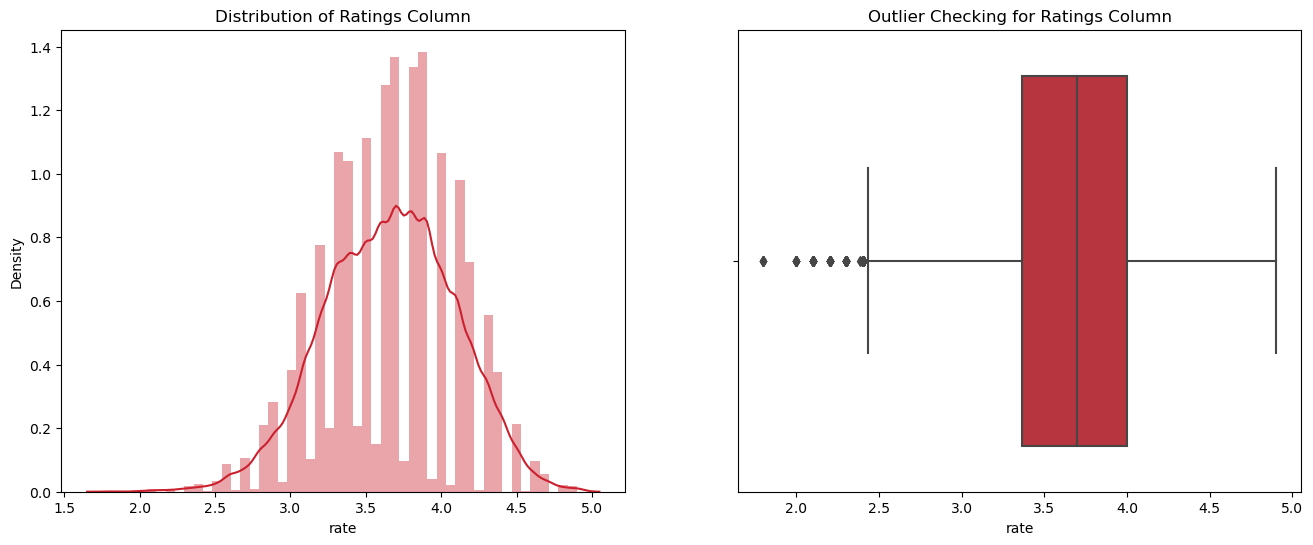

In [29]:
colors=['#cb202d','lightgrey']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.distplot(sample['rate'],ax=axes[0],color='#cb202d')
axes[0].set_title('Distribution of Ratings Column')

sns.boxplot(x=sample['rate'],ax=axes[1],palette=colors)
axes[1].set_title('Outlier Checking for Ratings Column')

print(sample['rate'].skew())
plt.show()

`observation`: 
- Ratings column follow somewhat normal distributution and it is skewed left by -0.155
- As we can see there are outliers after 2.5 lower bound of the boxplot

7.402432275655974


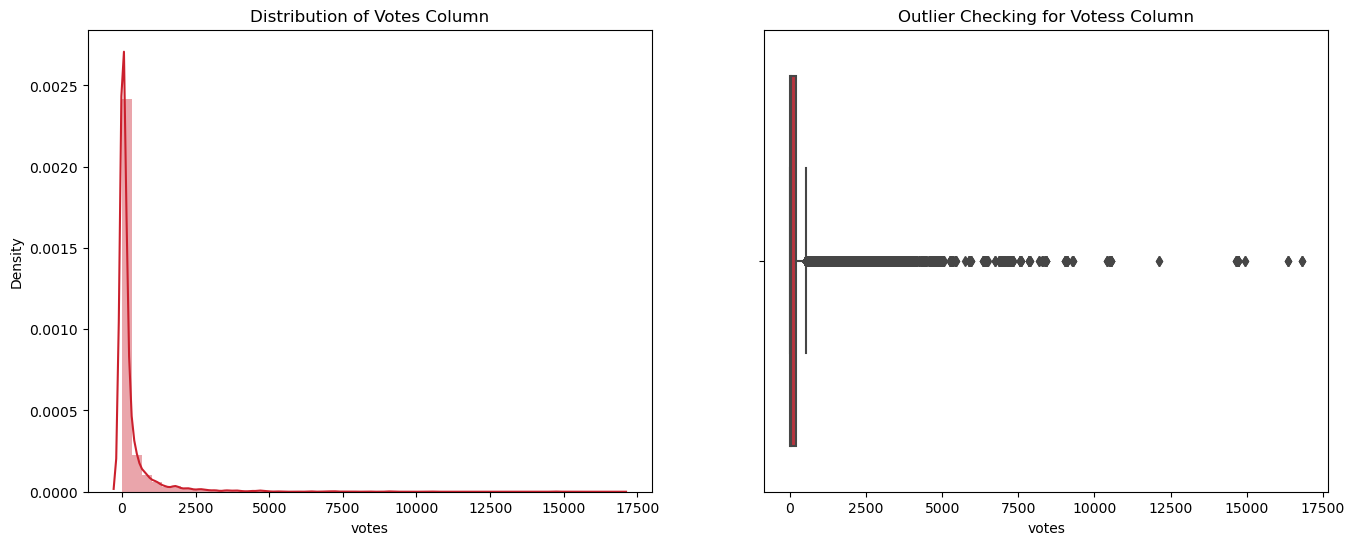

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.distplot(sample['votes'],ax=axes[0],color='#cb202d')
axes[0].set_title('Distribution of Votes Column')

sns.boxplot(x=sample['votes'],ax=axes[1],palette=colors)
axes[1].set_title('Outlier Checking for Votess Column')

print(sample['votes'].skew())
plt.show()

`Observation`: 
- Votes column is heavily skewed towards right and it has a bad distribution
- Votes Column got so many outliers

0.27654611861731854


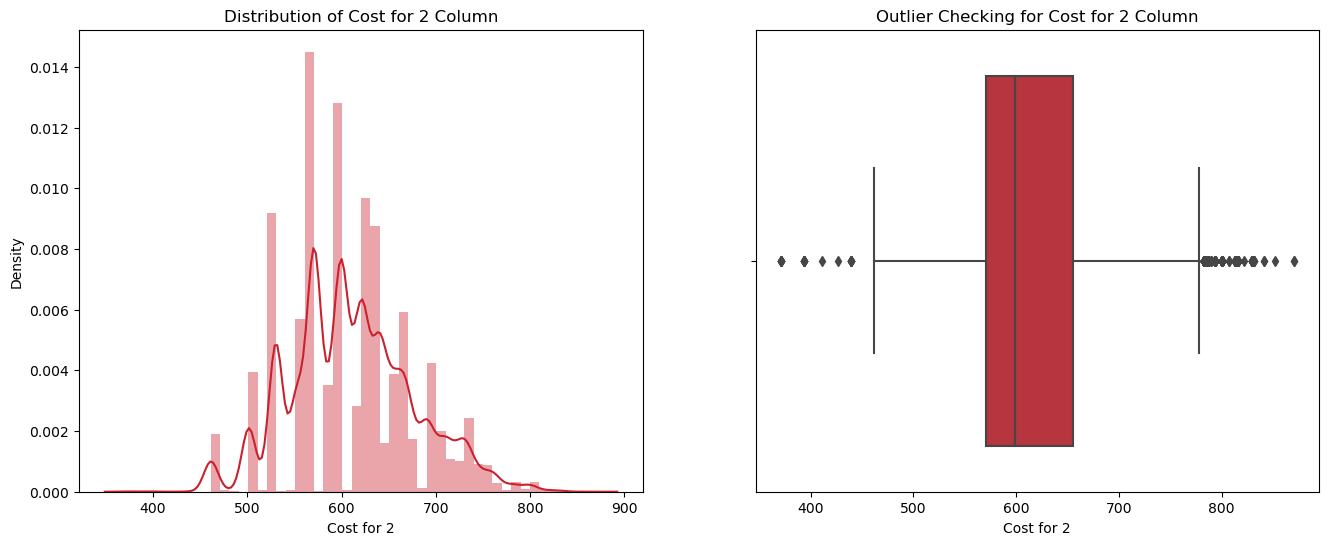

In [31]:
colors=['#cb202d','#2d2d2d']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.distplot(sample['Cost for 2'],ax=axes[0],color='#cb202d',kde=True)
axes[0].set_title('Distribution of Cost for 2 Column')

sns.boxplot(x=sample['Cost for 2'],ax=axes[1],palette=colors)
axes[1].set_title('Outlier Checking for Cost for 2 Column')

print(sample['Cost for 2'].skew())
plt.show()

`Observation`: 
- Somewhat normal distribution
- Some outliers

### Let's Explore how many Restaurants have online Orders Facility

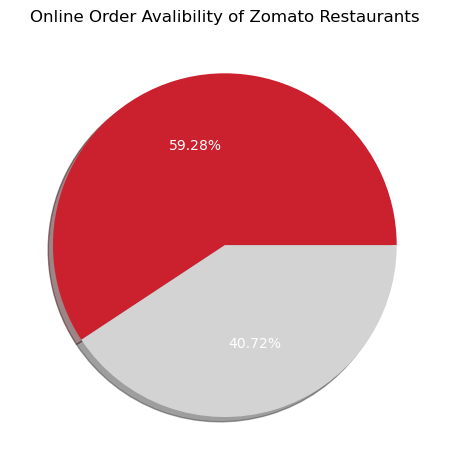

In [32]:
## value counts
Online = sample['Online Order'].value_counts()
Label = ['Online Order Available','Online Order Not Available'] ## Manually Labelling 

plt.pie(Online, labels=Label,shadow=True,autopct='%1.2f%%',colors=['#cb202d','lightgrey'],textprops={'color': 'white'})
plt.title('Online Order Avalibility of Zomato Restaurants')
plt.tight_layout()
plt.show()

### Exploring the availability of Customers can book the table or not?

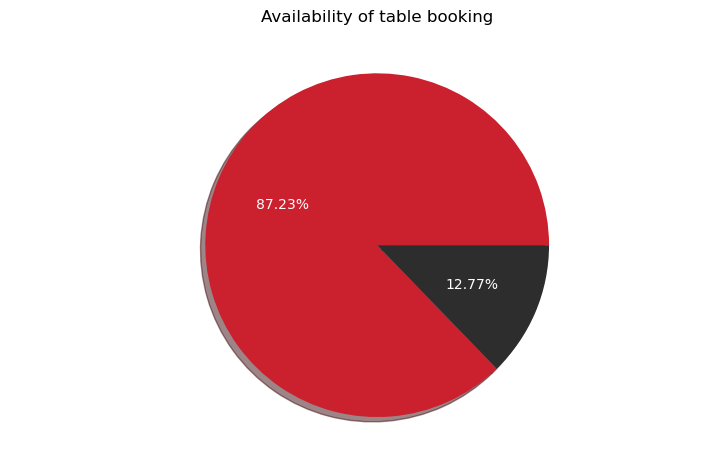

In [33]:
## Getting the values

Table = sample['book_table'].value_counts()
Labels = ['Booking Table Not Available','Booking Table Available']

plt.pie(Table, labels=Labels,autopct='%1.2f%%',shadow=True,colors=colors, textprops={'color':'white'})
plt.title("Availability of table booking")
plt.tight_layout()
plt.show()

`Observation`: Imbalance

### Exploring the types of restaurants in bangalore

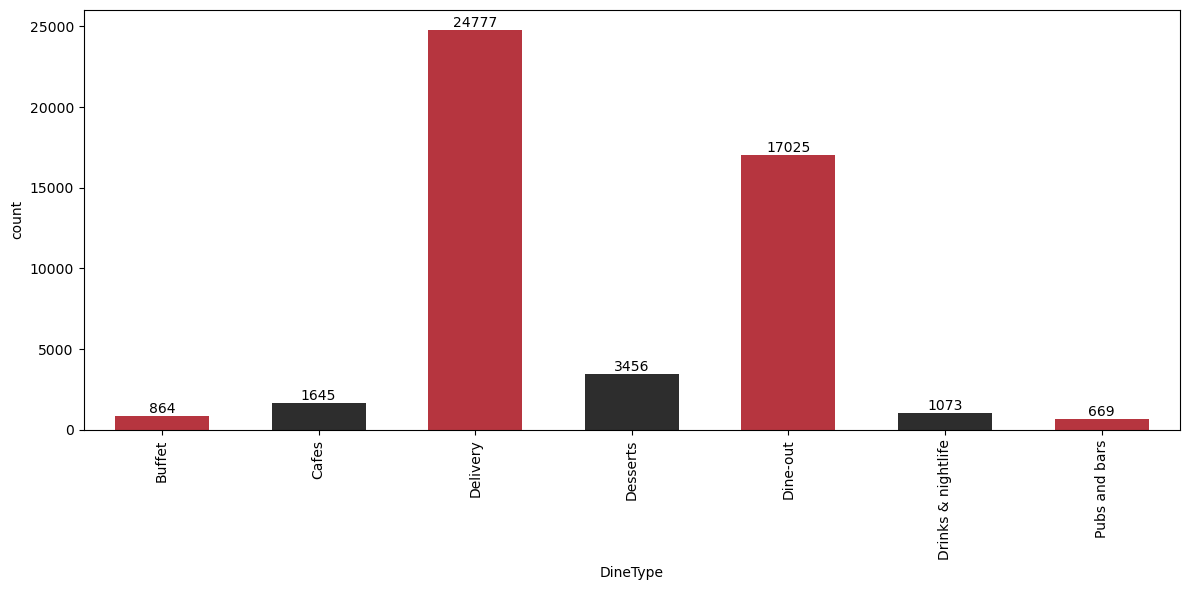

In [34]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='DineType',data=sample,palette=colors,width=0.6)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

`Observation`: 
- Delivery is the highest dine type in bangalore, (cloud kitchens to save cost, late night zomato delivery) because zomato delivers, zomato has reaches out to cloud kitchens or vice versa.

### Exploring the types of restaurant

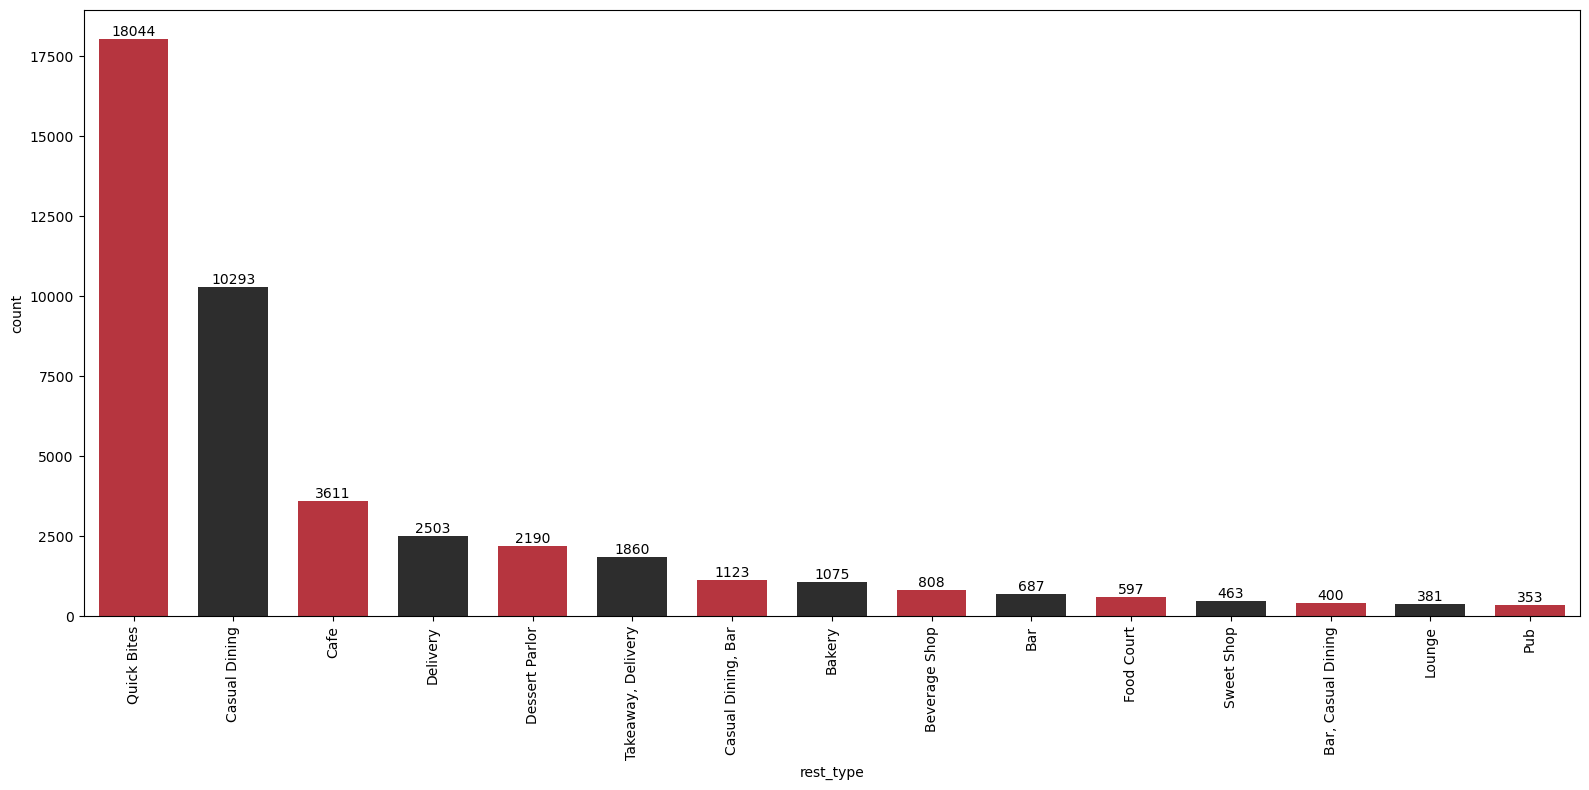

In [35]:
rest_type = sample['rest_type'].value_counts().nlargest(15).reset_index()

plt.figure(figsize=(16,8))
ax=sns.barplot(x='rest_type',y='count',data=rest_type,palette=colors,width=0.7)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

`Observation`: Do a little research on quick bites 

### Exploring in which location max no.of restaurants are located in? 

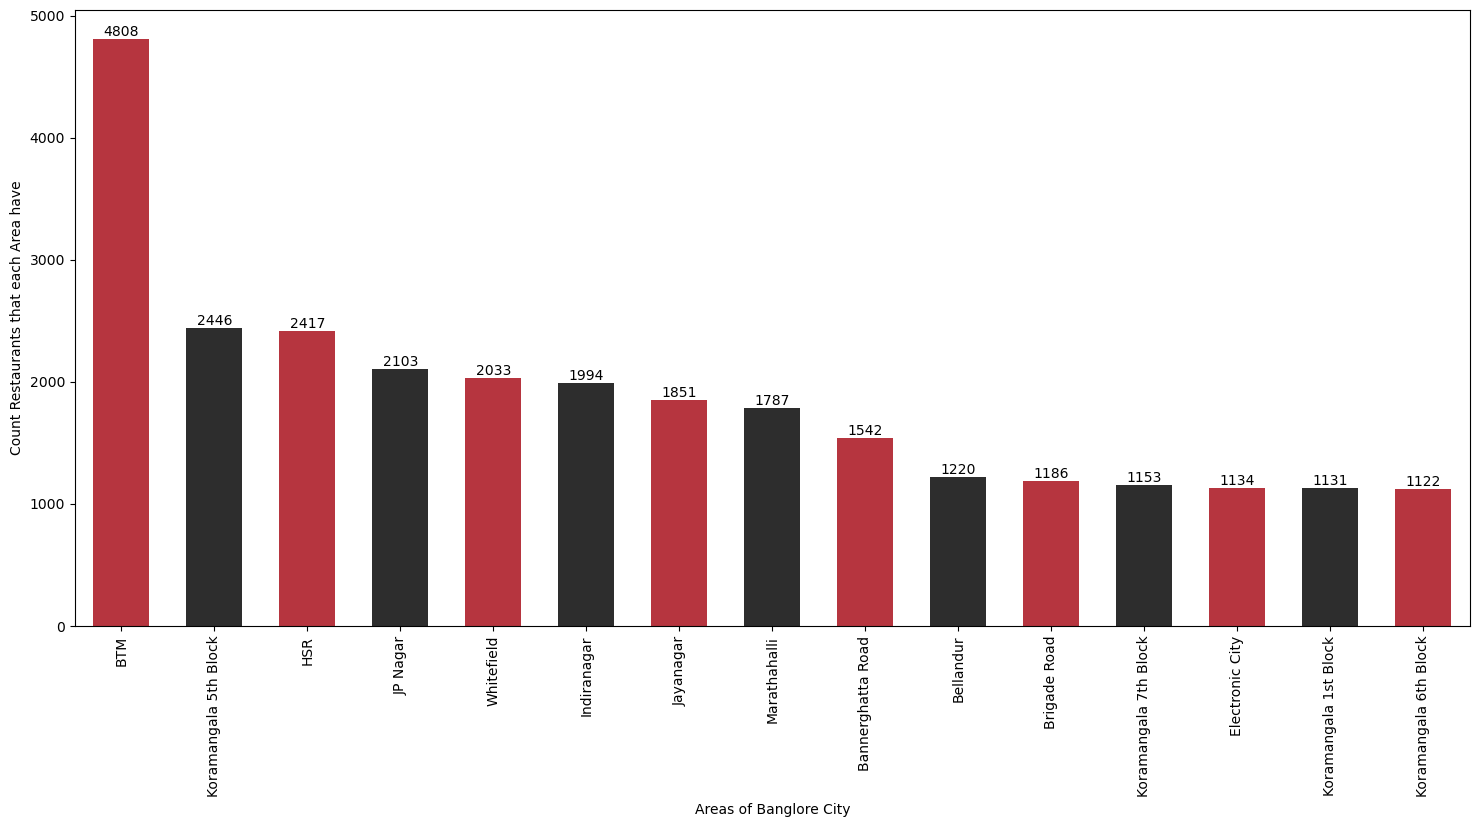

In [36]:
Location = sample['location'].value_counts().nlargest(15).reset_index()

plt.figure(figsize=(18,8))
ax = sns.barplot(x='location',y='count',data=Location,palette=colors,width=0.6)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation='vertical')
plt.xlabel("Areas of Banglore City")
plt.ylabel("Count Restaurants that each Area have")
plt.show()

### Exploring top 15 dishes liked by People

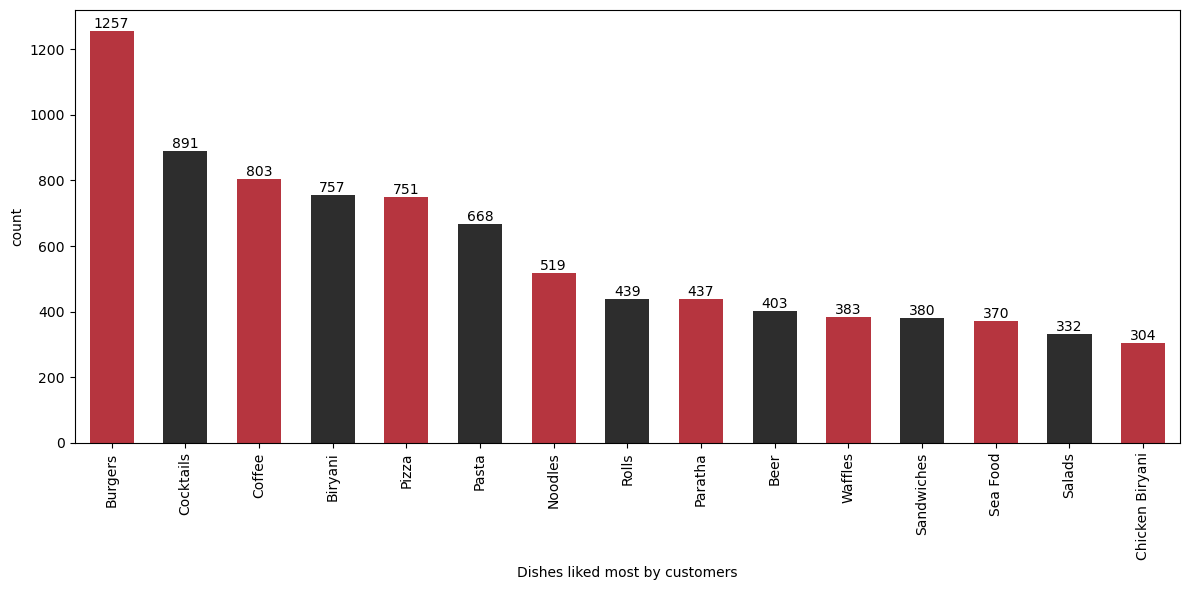

In [37]:
Dish_Liked = sample['dish_liked'].value_counts().nlargest(15).reset_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(x='dish_liked',y='count',data=Dish_Liked,palette=colors,width=0.6)

for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation='vertical')
plt.xlabel("Dishes liked most by customers")
plt.tight_layout()
plt.show()

`Observations`: Burgers

### Let's explore the relation between Cost and Ratings

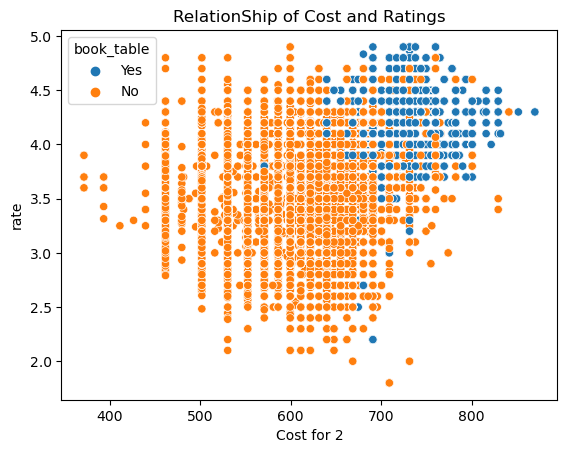

In [38]:
sns.scatterplot(x='Cost for 2',y='rate',data=sample,hue='book_table')
plt.title("RelationShip of Cost and Ratings")
plt.show()

### Let's explore the cost and votes

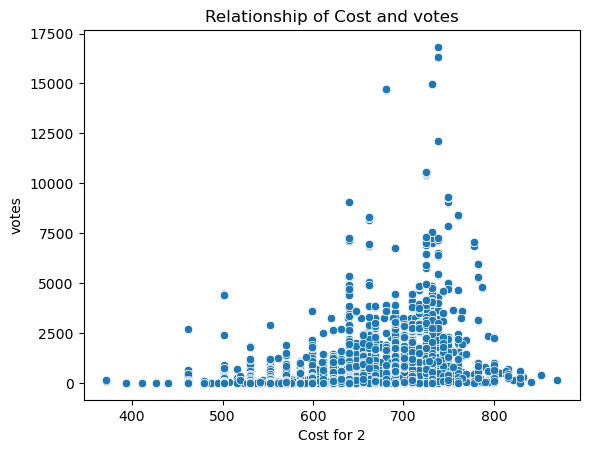

In [39]:
sns.scatterplot(x='Cost for 2',y='votes',data=sample)
plt.title("Relationship of Cost and votes")
plt.show()

### Let's explore the average cost for the Dine Type

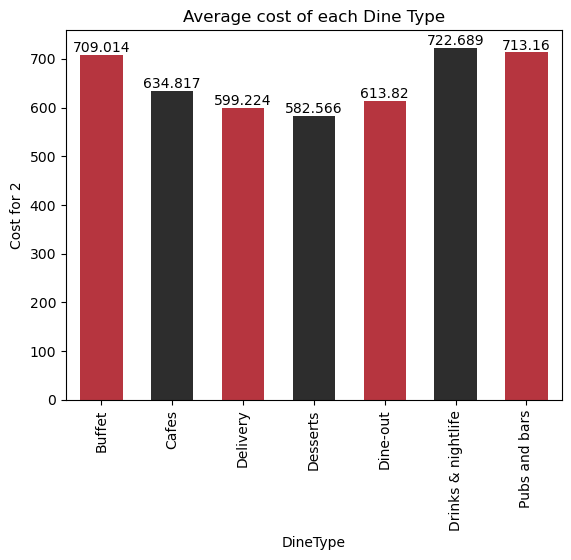

In [40]:
average = sample.groupby(['DineType'])['Cost for 2'].mean().reset_index()

ax = sns.barplot(x='DineType', y='Cost for 2',data=average,palette=colors,width=0.6)
plt.title("Average cost of each Dine Type")
plt.xticks(rotation='vertical')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

### Let's explore average cost for cusines

In [41]:
cusines = sample.groupby(['cuisines'])['Cost for 2'].mean().nlargest(15).reset_index()

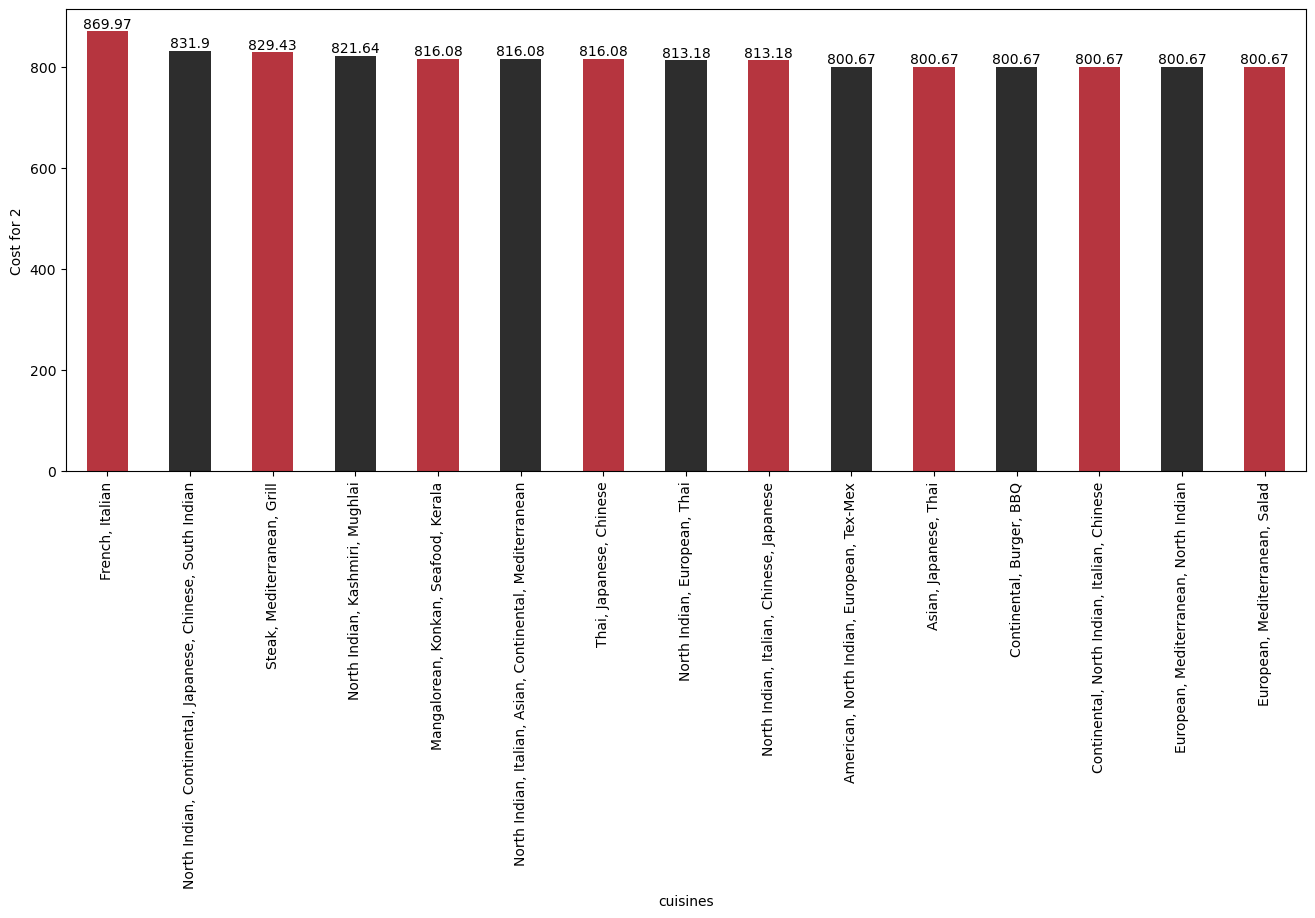

In [42]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x='cuisines',y='Cost for 2',data=cusines,palette=colors,width=0.5)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation='vertical')
plt.show()

`Observation:`French and Italian are costlier

###  Exploring the ratings vs DineType

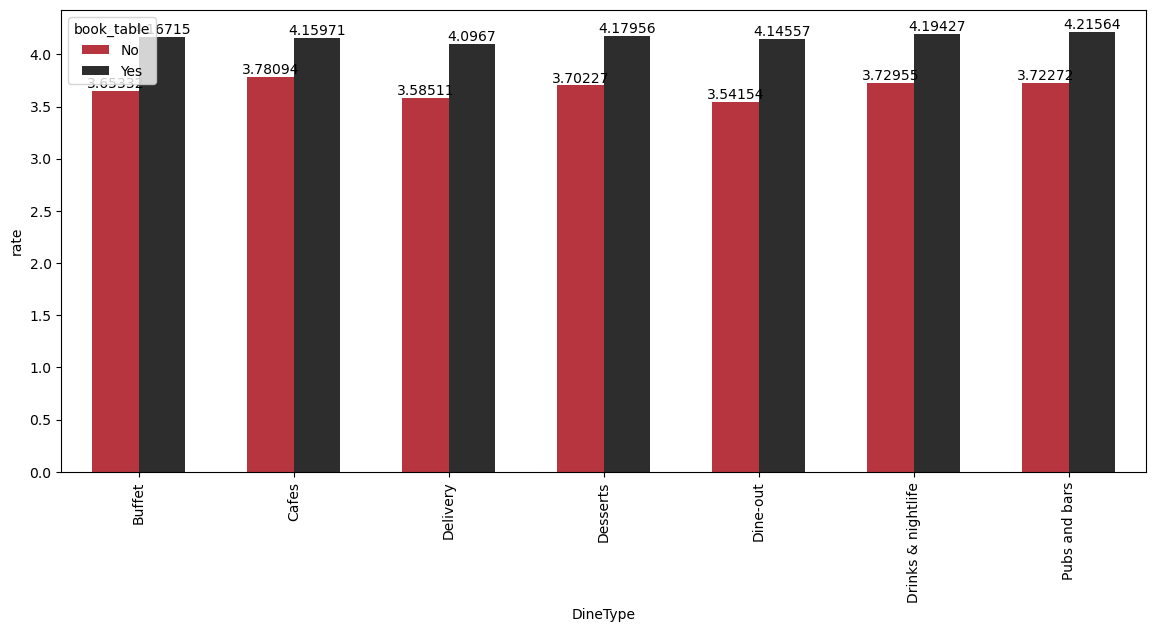

In [43]:
dinetype = sample.groupby(['DineType','book_table'])['rate'].mean().reset_index()

plt.figure(figsize=(14,6))
ax = sns.barplot(x='DineType',y='rate',data=dinetype,width=0.6,palette=colors,hue='book_table')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation='vertical')
plt.show()

### Ratings based on restaurant type

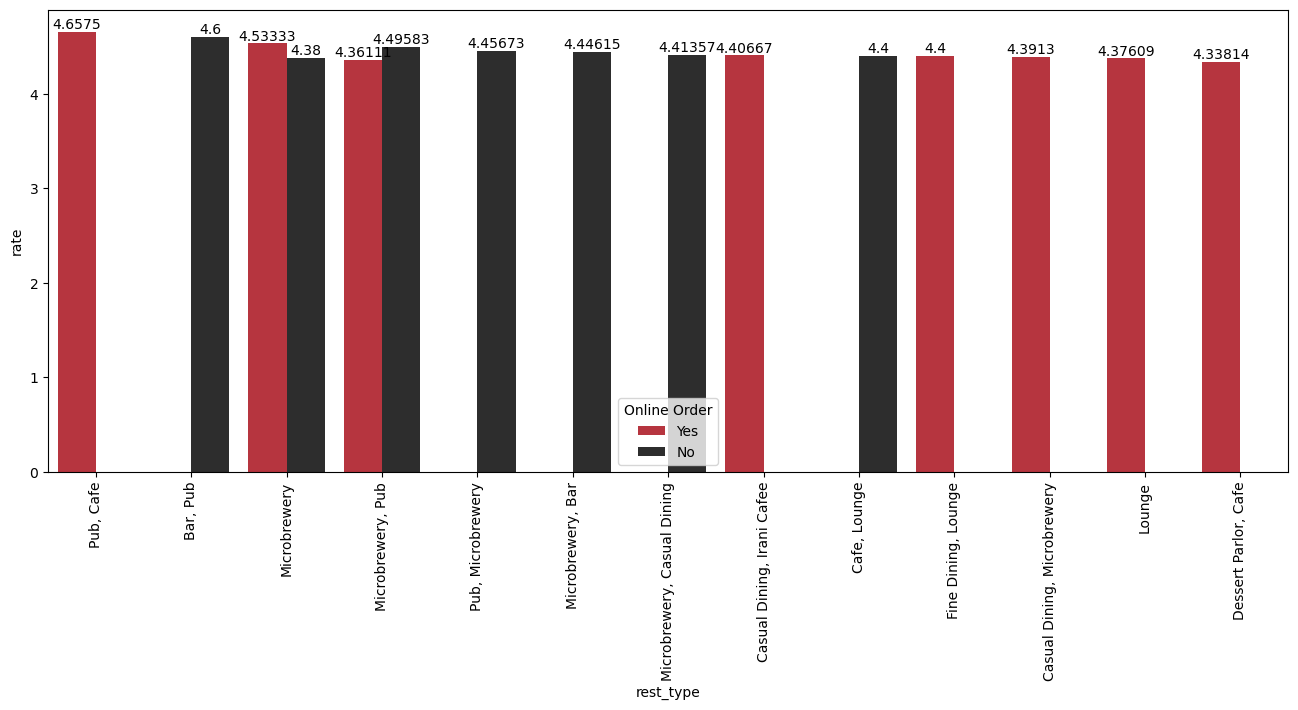

In [44]:
Rest_Type = sample.groupby(['rest_type','Online Order'])['rate'].mean().nlargest(15).reset_index()

plt.figure(figsize=(16,6))
ax=sns.barplot(x='rest_type',y='rate',data=Rest_Type,palette=colors,hue='Online Order')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation='vertical')
plt.show()

`Observation`: Bar and pub

### Total number of ratings recieved based on Cuisine and dish liked 

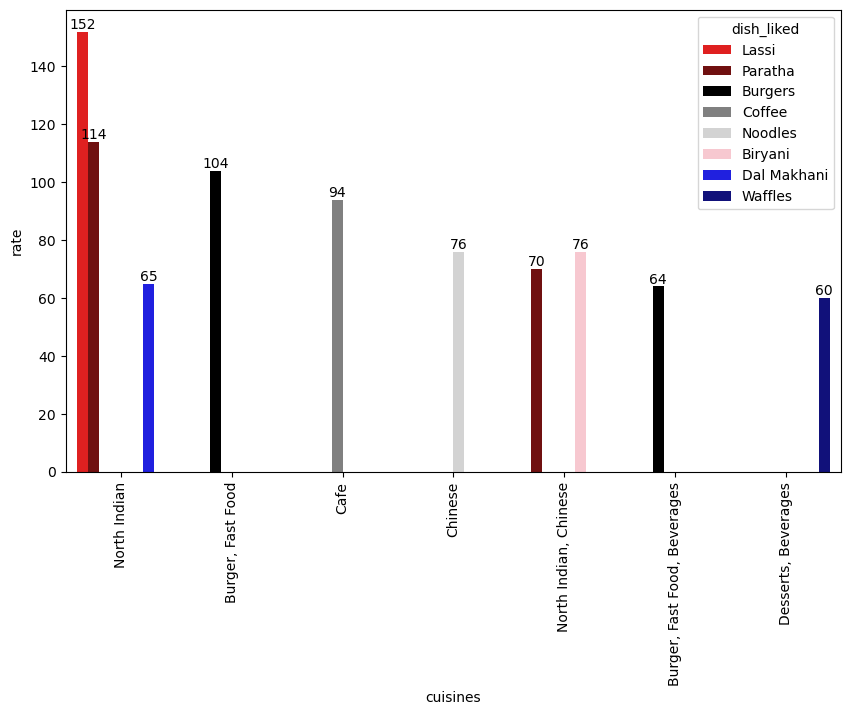

In [45]:
num_ratings = sample.groupby(['cuisines','dish_liked'])['rate'].count().nlargest(10).reset_index()

colors1 = ['red','maroon','black','grey','lightgrey','pink','blue','darkblue']
plt.figure(figsize=(10,6))
ax = sns.barplot(x='cuisines',y='rate',hue='dish_liked',data=num_ratings,palette=colors1)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation='vertical')
plt.show()

### Exploring Availability of Online and Table booking for different localities

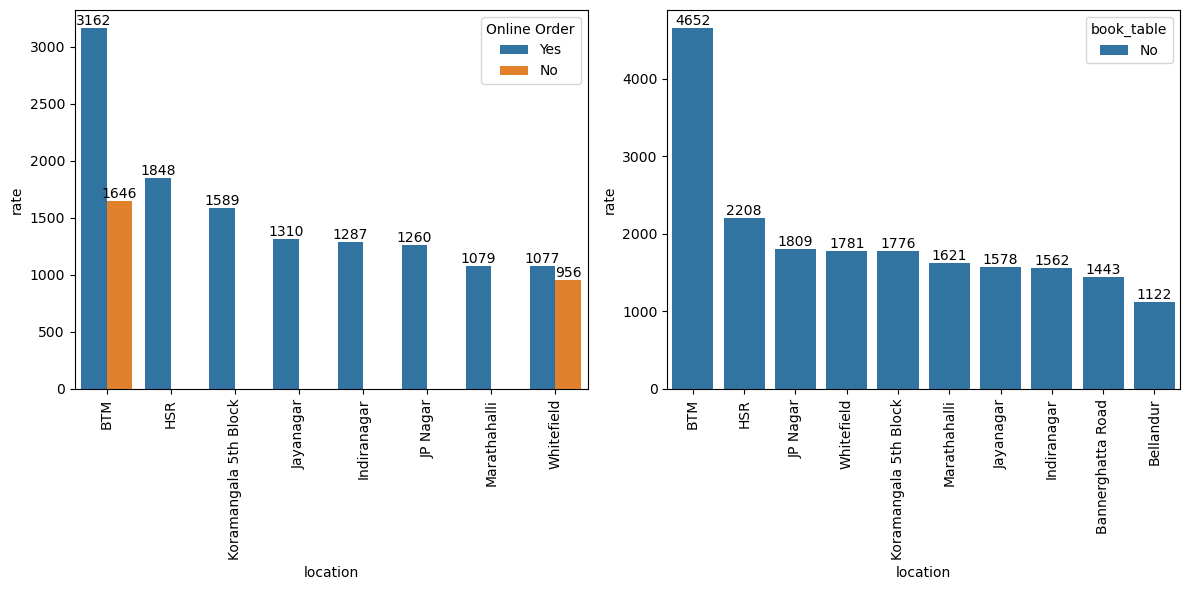

In [46]:
# Grouping by location and Online Order, then counting the ratings and getting the top 10
Location_ratings = sample.groupby(['location', 'Online Order'])['rate'].count().nlargest(10).reset_index()

# Grouping by location and book_table, then counting the ratings and getting the top 10
Location_ratings1 = sample.groupby(['location', 'book_table'])['rate'].count().nlargest(10).reset_index()

# Creating the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting the first subplot
sns.barplot(x='location', y='rate', data=Location_ratings, hue='Online Order', ax=axes[0])
# Adding labels for each bar in the first subplot
for i in axes[0].containers:
    axes[0].bar_label(i)
# Setting the rotation of x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=90)

# Plotting the second subplot
sns.barplot(x='location', y='rate', data=Location_ratings1, hue='book_table', ax=axes[1])
# Adding labels for each bar in the second subplot
for i in axes[1].containers:
    axes[1].bar_label(i)
# Setting the rotation of x-axis labels for better readability
axes[1].tick_params(axis='x', rotation=90)

# Displaying the plot
plt.tight_layout()
plt.show()


#### Replacing Categorical values into Binary Numerical Values

In [47]:
sample['Online Order'] = sample['Online Order'].replace('Yes',1).replace('No',0)

sample['book_table'] = sample['book_table'].replace('Yes',1).replace('No',0)

In [48]:
sample.corr(numeric_only=True)['rate']

Online Order    0.141645
book_table      0.430782
rate            1.000000
votes           0.438160
Cost for 2      0.379478
Name: rate, dtype: float64

### Correlation matrix

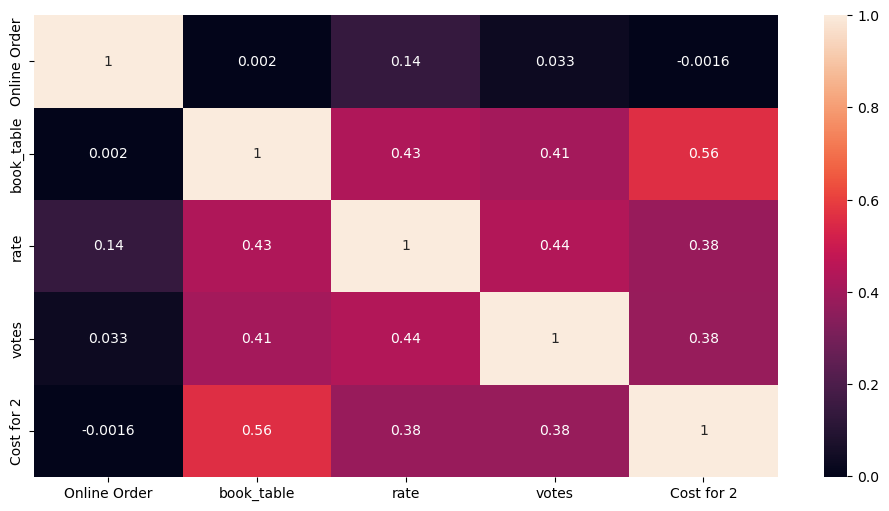

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(sample.corr(numeric_only=True,method='pearson'),annot=True)
plt.show()

In [50]:
restaurant_df = sample.copy()

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Feature Engineering

In [52]:
restaurant_df['rest_type'] = restaurant_df['rest_type'].str.split(',',expand=True)[0]
a=restaurant_df['rest_type'].value_counts()

def replace(df):
    df['rest_type'] = df['rest_type'].replace({
        'Fine Dining': 'Others',
        'Sweet Shop': 'Others',
        'Food Truck': 'Others',
        'Pop Up': 'Others',
        'Bhojanalya' : 'Others',
        'Confectionery' : 'Others',
        'Club' : 'Others',
        'Dhaba' : 'Others',
        'Kiosk' : 'Others',
        'Microbrewery' : 'Others',
        'Mess' : 'Others',
        "Lounge": 'Others'     
    })
    return df

restaurant_df = replace(restaurant_df)

In [53]:
restaurant_df.drop(columns=['name','cuisines','Reviews','location','dish_liked'],inplace=True)

### Train test split and Feature Engineering

In [54]:
from sklearn.model_selection import train_test_split
y = restaurant_df['rate']
x = restaurant_df.drop(columns=['rate'])
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.8,random_state=42)

In [55]:
print("X Train and X Test shape:", x_train.shape," ,", x_test.shape)
print("Y Train and Y Test shape:", y_train.shape," ,", y_test.shape)

X Train and X Test shape: (39607, 6)  , (9902, 6)
Y Train and Y Test shape: (39607,)  , (9902,)


In [56]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

sc = StandardScaler()
ohe = OneHotEncoder()
le = LabelEncoder()


transformer = ColumnTransformer(transformers=[
    ('tnsf1', OneHotEncoder(sparse=False,drop='first'),['rest_type','DineType']),
    ('tnsf2',StandardScaler(),['Online Order','book_table','votes','Cost for 2'])
])

x_train = pd.DataFrame(transformer.fit_transform(x_train))
x_test = pd.DataFrame(transformer.transform(x_test))

### Model Building and Model Evaulating

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


pipelines = {
    'Linear Regression': Pipeline([('regressor', LinearRegression())]),
    'Ridge': Pipeline([('regressor', Ridge(max_iter=100))]),
    'Lasso': Pipeline([('regressor', Lasso())]),
    #'SVR': Pipeline([('regressor', SVR(kernel='linear'))]),
    'Decision Tree': Pipeline([('regressor', DecisionTreeRegressor(criterion='squared_error', max_depth=3))]),
    'KNN': Pipeline([('regressor', KNeighborsRegressor(n_neighbors=3))])
}

# Train and test each model
for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"Model: {name}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    print()

Model: Linear Regression
MSE: 0.12
MAE: 0.27
R-squared: 0.34

Model: Ridge
MSE: 0.12
MAE: 0.27
R-squared: 0.34

Model: Lasso
MSE: 0.18
MAE: 0.35
R-squared: -0.00

Model: Decision Tree
MSE: 0.11
MAE: 0.24
R-squared: 0.42

Model: KNN
MSE: 0.07
MAE: 0.17
R-squared: 0.60



### Hyperparameter tuning

In [123]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'Linear Regression': {},
    'Ridge': {'regressor__alpha': np.logspace(-3, 3, 7)},  # Example grid for Ridge
    'Lasso': {'regressor__alpha': np.logspace(-3, 3, 7)},  # Example grid for Lasso
    'Decision Tree': {'regressor__max_depth': [3, 5, 7]},  # Example grid for Decision Tree
    'KNN': {'regressor__n_neighbors': [3, 5, 7]}  # Example grid for KNN
}

# Create pipelines with the models
pipelines = {
    'Linear Regression': Pipeline([('regressor', LinearRegression())]),
    'Ridge': Pipeline([('regressor', Ridge())]),
    'Lasso': Pipeline([('regressor', Lasso())]),
    'Decision Tree': Pipeline([('regressor', DecisionTreeRegressor())]),
    'KNN': Pipeline([('regressor', KNeighborsRegressor(n_neighbors=3,weights='distance',metric='euclidean'))])
}

# Perform GridSearchCV for each model
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='neg_mean_squared_error')
    model.fit(x_train, y_train)
    best_model = model.best_estimator_
    
    predictions = best_model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"Model: {name}")
    print(f"Best Parameters: {model.best_params_}")
    print(f"MSE: {mse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"R-squared: {r2}")
    print()

Model: Linear Regression
Best Parameters: {}
MSE: 0.120
MAE: 0.270
R-squared: 0.3431270405205771

Model: Ridge
Best Parameters: {'regressor__alpha': 10.0}
MSE: 0.120
MAE: 0.270
R-squared: 0.3431279553835578

Model: Lasso
Best Parameters: {'regressor__alpha': 0.001}
MSE: 0.121
MAE: 0.270
R-squared: 0.341800294684136

Model: Decision Tree
Best Parameters: {'regressor__max_depth': 7}
MSE: 0.092
MAE: 0.220
R-squared: 0.4989311527260888

Model: KNN
Best Parameters: {'regressor__n_neighbors': 7}
MSE: 0.060
MAE: 0.143
R-squared: 0.6715490931673014



### Random Forest

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

n_estimators = [20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8,10]
max_samples = [0.5,0.75,1.0]

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'max_samples':max_samples
}

rf_grid = GridSearchCV(estimator = rf,
                      param_grid = param_grid,
                      cv = 5,
                      verbose = 2,
                      n_jobs = -1)
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=8), n_jobs=-1,
             param_grid={'max_depth': [2, 8, 10],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [124]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'max_depth': 10, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 120}
0.5708299287553047


### Gradient Boosting and XG Boost

In [127]:
regressors = {
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'XGBoost Regression': xgb.XGBRegressor()
}

# Define hyperparameter grids for each regressor
param_grids = {
    'Gradient Boosting Regression': {'regressor__n_estimators': [50, 100, 150], 'regressor__learning_rate': [0.1, 0.01, 0.001]},
    'XGBoost Regression': {'regressor__n_estimators': [50, 100, 150], 'regressor__learning_rate': [0.1, 0.01, 0.001]}
}

# Define pipeline for scaling and regressor
pipe = Pipeline([
    ('regressor', None)
])

# Perform hyperparameter tuning and model evaluation for each regressor
for reg_name, reg in regressors.items():
    pipe.set_params(regressor=reg)
    
    if reg_name in param_grids:
        param_grid = param_grids[reg_name]
        grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(x_train, y_train)
        best_reg = grid_search.best_estimator_
    else:
        best_reg = reg.fit(x_train, y_train)
    
    # Evaluate the model
    y_pred = best_reg.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{reg_name} Mean Squared Error: {mse:.4f}")
    print(f"{reg_name} R-squared Score: {r2:.4f}")

# XGBoost Regression
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(x_train, y_train)
y_pred_xgb = xgb_reg.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("\nXGBoost Regression Mean Squared Error:", mse_xgb)
print("XGBoost Regression R-squared Score:", r2_xgb)



Gradient Boosting Regression Mean Squared Error: 0.0902
Gradient Boosting Regression R-squared Score: 0.5074

XGBoost Regression Mean Squared Error: 0.0762
XGBoost Regression R-squared Score: 0.5836

XGBoost Regression Mean Squared Error: 0.06972497454997957
XGBoost Regression R-squared Score: 0.6191758856977589


# With the Help of KNearest Neighbor I have achieved a R2Score of 67